## Assignment for Week 6 - K-Means and Hierarchical Clustering

### Exerise:
#### KMeans and Hierarchial Clustering

Collect data from twitter using your choice of hashtag (at least 1000 tweets). 
To gather your Twitter data, I would recommend using the python library tweepy.<br>
Feel free to adopt the code from : https://www.geeksforgeeks.org/extracting-tweets-containing-a-particular-hashtag-using-python/
Note: Reddit data can be used instead of Twitter data for this assignment.

- You will use both K-Means and HCA to cluster the collected data
- Draw a dendrogram
- Identify number of optimum clusters, and justify how do you pick number of clusters
- List the top 10 most frequent words
- Visualize using wordclouds
- Summarize your findings

### Deliverables:

Upload your notebook's .ipynb file and pdf printouts.
   
**Important:** Make sure your provide complete and thorough explanations for all of your analysis. You need to defend your thought processes and reasoning.

    Loading required packages for tweets scraping, text analytics, and clustering.

In [42]:
import pandas as pd
import numpy as np
import tweepy
from sklearn.cluster import KMeans
import re
import nltk
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer 
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report
from sklearn import metrics

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import string


import matplotlib.pyplot as plt



    Downloading stopword files if necessary

In [2]:

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ahmad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ahmad\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

    The function below is to print scraped tweets

In [3]:
  
# function to display data of each tweet
def printtweetdata(n, ith_tweet):
    print()
    print(f"Tweet {n}:")
    print(f"Username:{ith_tweet[0]}")
    print(f"Description:{ith_tweet[1]}")
    print(f"Location:{ith_tweet[2]}")
    print(f"Following Count:{ith_tweet[3]}")
    print(f"Follower Count:{ith_tweet[4]}")
    print(f"Total Tweets:{ith_tweet[5]}")
    print(f"Retweet Count:{ith_tweet[6]}")
    print(f"Tweet Text:{ith_tweet[7]}")
    print(f"Hashtags Used:{ith_tweet[8]}")
  

    This function scrapes tweets, and save them into a CSV file

In [4]:
# function to perform data extraction
def scrape(words, date_since, numtweet):
      
    # Creating DataFrame using pandas
    db = pd.DataFrame(columns=['username', 'description', 'location', 'following',
                               'followers', 'totaltweets', 'retweetcount', 'text', 'hashtags'])
      
    # We are using .Cursor() to search through twitter for the required tweets.
    # The number of tweets can be restricted using .items(number of tweets)
    tweets = tweepy.Cursor(api.search_tweets, q=words, lang="en",
                           since=date_since, tweet_mode='extended').items(numtweet)
     
    # .Cursor() returns an iterable object. Each item in 
    # the iterator has various attributes that you can access to 
    # get information about each tweet
    list_tweets = [tweet for tweet in tweets]
      
    # Counter to maintain Tweet Count
    i = 1  
    # we will iterate over each tweet in the list for extracting information about each tweet
    for tweet in list_tweets:
        username = tweet.user.screen_name
        description = tweet.user.description
        location = tweet.user.location
        following = tweet.user.friends_count
        followers = tweet.user.followers_count
        totaltweets = tweet.user.statuses_count
        retweetcount = tweet.retweet_count
        hashtags = tweet.entities['hashtags']
          
        # Retweets can be distinguished by a retweeted_status attribute,
        # in case it is an invalid reference, except block will be executed
        try:
            text = tweet.retweeted_status.full_text
        except AttributeError:
            text = tweet.full_text
        hashtext = list()
        for j in range(0, len(hashtags)):
            hashtext.append(hashtags[j]['text'])
          
        # Here we are appending all the extracted information in the DataFrame
        ith_tweet = [username, description, location, following,
                     followers, totaltweets, retweetcount, text, hashtext]
        db.loc[len(db)] = ith_tweet
             
        # Function call to print tweet data on screen
        printtweetdata(i, ith_tweet)
        i = i+1
    filename = 'scraped_tweets.csv'
     # we will save our database as a CSV file.
    db.to_csv(filename)
  

    Making connection to twitter API

In [5]:
 # Enter your own credentials obtained 
    # from your developer account
consumer_key = "judhfnWe45rVpl39neEVBW8mG"
consumer_secret = "zb8fYzndz8bJVuH5pcAdAs7TjA8FJG2rr2uKV5w4aoL02vFgos"
access_key = "298039777-9fJ347njgR8IW0E4B8bcrFegQKrwk9uXV3rk44IK"
access_secret = "wKt43YKKRxoEows0J87Md2sUPvN2AsYkWtieRS34ESBdA"
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth)

    This code is calling scrape function with date, hashtag, and number of tweets. Here I scraped tweets associated with #SaudiArabianGP, which is F1 Grand Prix held in Jeddah, Saudi Arabia and it's one of the most trending hashtags globally 

In [6]:

words = '#SaudiArabianGP'
date_since = '2021-11-20'
      
    # number of tweets you want to extract in one run
numtweet = 1000 
scrape(words, date_since, numtweet)


Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter


Tweet 1:
Username:marta_silva_15
Description:eu vi ali uma palmeira,, EGC🏐
Location:esmoriz
Following Count:282
Follower Count:275
Total Tweets:14416
Retweet Count:340
Tweet Text:Our top 🔟 under the lights!

#SaudiArabianGP 🇸🇦 #F1 https://t.co/cjkswSYiBn
Hashtags Used:['SaudiArabianGP', 'F1']

Tweet 2:
Username:Its_danielito16
Description:I'm stupid, I know, I don't like to be, but hey, maybe it's a virtue.
#loveyourself #liveyourlife
Location:
Following Count:180
Follower Count:161
Total Tweets:3593
Retweet Count:11602
Tweet Text:LEWIS HAMILTON TAKES THE 🏁

And with the fastest lap, he moves level in the championship race with Max Verstappen on 369.5 points!

#SaudiArabianGP 🇸🇦 #F1 https://t.co/hnHfPElD3J
Hashtags Used:[]

Tweet 3:
Username:SKZR_Josu
Description:24.Youtuber, streamer y F1 driver for @SKZR_eSports .
https://t.co/xTgDgBVuH4
Location:España
Following Count:4997
Follower Count:661
Total Tweets:12027
Retweet Count:15130
Tweet Text:ONE RACE TO GO. ZERO POINTS IN IT.

Who w


Tweet 39:
Username:valsarb
Description:MIP / ⚕️EMCS
Location:
Following Count:242
Follower Count:299
Total Tweets:1049
Retweet Count:32
Tweet Text:Hamilton should be black flagged , look at the replay @fia you morons , not 5 seconds penalty for Verstappen #f1 #SaudiArabianGP https://t.co/bCgs7Z0lSs
Hashtags Used:['f1']

Tweet 40:
Username:DerpSquad42
Description:F1 Ferrari 🏎 | Yankees ⚾️ | Sooners 🏈 | Thunder 🏀 | 49ers 🏈 | Blues 🏒 |
Location:
Following Count:287
Follower Count:40
Total Tweets:2521
Retweet Count:2704
Tweet Text:Where to start? We finished 2nd, after an eventful race and a lot of things happened that I don’t fully agree with. I went for it on track and gave it my all. Thanks to all fans, for supporting me and voting me Driver Of The Day! On to Abu Dhabi #KeepPushing 🇸🇦 #SaudiArabianGP https://t.co/5kV8083ebd
Hashtags Used:[]

Tweet 41:
Username:Salem309
Description:دراما كينج
Location:مزرعة الانسان
Following Count:173
Follower Count:7165
Total Tweets:234077
Retweet Coun


Tweet 72:
Username:f1andsun
Description:Living under the bright sun while enjoying formula 1
Location:Aruba
Following Count:40
Follower Count:0
Total Tweets:139
Retweet Count:227
Tweet Text:For those of you pushing the British media's "Max left no space" bs, use your eyes please.
#SaudiArabianGP https://t.co/YJyaDnjhoF
Hashtags Used:['SaudiArabianGP']

Tweet 73:
Username:_clarecatherine
Description:
Location:
Following Count:1132
Follower Count:1037
Total Tweets:56462
Retweet Count:2705
Tweet Text:Where to start? We finished 2nd, after an eventful race and a lot of things happened that I don’t fully agree with. I went for it on track and gave it my all. Thanks to all fans, for supporting me and voting me Driver Of The Day! On to Abu Dhabi #KeepPushing 🇸🇦 #SaudiArabianGP https://t.co/5kV8083ebd
Hashtags Used:[]

Tweet 74:
Username:reglimagrain
Description:Arable Technical Manager for Limagrain UK. Views are my own.
Location:Rothwell, Lincolnshire
Following Count:5001
Follower Count:284


Tweet 106:
Username:hamudi_youssef
Description:
Location:Amante de velocidad
Following Count:500
Follower Count:25
Total Tweets:1293
Retweet Count:2705
Tweet Text:Where to start? We finished 2nd, after an eventful race and a lot of things happened that I don’t fully agree with. I went for it on track and gave it my all. Thanks to all fans, for supporting me and voting me Driver Of The Day! On to Abu Dhabi #KeepPushing 🇸🇦 #SaudiArabianGP https://t.co/5kV8083ebd
Hashtags Used:[]

Tweet 107:
Username:caaangry
Description:
Location:San Rafael Mendoza
Following Count:4992
Follower Count:3622
Total Tweets:139898
Retweet Count:2705
Tweet Text:Where to start? We finished 2nd, after an eventful race and a lot of things happened that I don’t fully agree with. I went for it on track and gave it my all. Thanks to all fans, for supporting me and voting me Driver Of The Day! On to Abu Dhabi #KeepPushing 🇸🇦 #SaudiArabianGP https://t.co/5kV8083ebd
Hashtags Used:[]

Tweet 108:
Username:Natts_Lopez
Des


Tweet 142:
Username:BenTipler06
Description:
Location:
Following Count:306
Follower Count:29
Total Tweets:2168
Retweet Count:974
Tweet Text:Christian Horner and Toto Wolff during the Red Flags:

#F1 #WTF1 #SaudiArabianGP 
https://t.co/ktgilboEzJ
Hashtags Used:['F1', 'WTF1', 'SaudiArabianGP']

Tweet 143:
Username:Dafne33678409
Description:Annyeonhaseyo
Location:
Following Count:439
Follower Count:29
Total Tweets:10439
Retweet Count:2705
Tweet Text:Where to start? We finished 2nd, after an eventful race and a lot of things happened that I don’t fully agree with. I went for it on track and gave it my all. Thanks to all fans, for supporting me and voting me Driver Of The Day! On to Abu Dhabi #KeepPushing 🇸🇦 #SaudiArabianGP https://t.co/5kV8083ebd
Hashtags Used:[]

Tweet 144:
Username:Dramful30
Description:Designer I Artist I Art Teacher I TeamLH  #LH44 #SV5 #DR3 #LN4 #GR63 I F1 I Football I Tennis I @ManUtd @mercedesamgf1 🇬🇧🇲🇺
Location:London, England
Following Count:366
Follower Count:19

Tweet 176:
Username:Natts_Lopez
Description:A girl from Argentina who loves fashion, music, comics, NFL and football.
Love watching sports and criminal series.
#CARP #COYG #MiaSanMia #GoPats #Marvel #DC
Location:ARG/UK/GER/USA/NED
Following Count:5002
Follower Count:1361
Total Tweets:169269
Retweet Count:1265
Tweet Text:The moment @LewisHamilton drew level in the championship fight, with victory in Saudi Arabia ⚔️

#SaudiArabianGP 🇸🇦 #F1 https://t.co/plmETztmoh
Hashtags Used:['SaudiArabianGP', 'F1']

Tweet 177:
Username:pedialytpapi
Description:Zucaritas Back-Up Keeper...$nandooyarzabal
Location:
Following Count:617
Follower Count:219
Total Tweets:14451
Retweet Count:3920
Tweet Text:DRIVER STANDINGS

For the first time since 1974, our top two go into the finale TIED on points 🤯

#SaudiArabianGP 🇸🇦 #F1 https://t.co/aWnshxNyT7
Hashtags Used:['SaudiArabianGP', 'F1']

Tweet 178:
Username:alexelescalona
Description:ENFERMERO 👨🏻‍⚕️💉 - Máster en Investigación 📖📊 - Nadie me ha regalado nada, s

Location:ARG/UK/GER/USA/NED
Following Count:5002
Follower Count:1361
Total Tweets:169269
Retweet Count:3920
Tweet Text:DRIVER STANDINGS

For the first time since 1974, our top two go into the finale TIED on points 🤯

#SaudiArabianGP 🇸🇦 #F1 https://t.co/aWnshxNyT7
Hashtags Used:['SaudiArabianGP', 'F1']

Tweet 215:
Username:theodoulou__
Description:
Location:Cyprus
Following Count:20
Follower Count:0
Total Tweets:50
Retweet Count:7
Tweet Text:You can have a two place grid drop, or you can have whatever is in the mystery box

#SaudiArabianGP #F1 #WTF1 #Masi https://t.co/60PeYB7OwY
Hashtags Used:['SaudiArabianGP', 'F1', 'WTF1', 'Masi']

Tweet 216:
Username:TheEveileb
Description:Computer games - are my love. Electronics - are my best friend. I like to run early in the morning. Indigo. Vegan.
Languages: English, Russian.
Location:Russia, Komi Republic
Following Count:304
Follower Count:79
Total Tweets:7996
Retweet Count:2708
Tweet Text:Where to start? We finished 2nd, after an eventful race

Tweet 252:
Username:orihestrelinha
Description:Futuro engenheiro e nerdola
Location:Rio das Ostras, Brasil
Following Count:316
Follower Count:27
Total Tweets:733
Retweet Count:15131
Tweet Text:ONE RACE TO GO. ZERO POINTS IN IT.

Who wins?!

#SaudiArabianGP 🇸🇦 #F1 https://t.co/6RfnXMutH7
Hashtags Used:['SaudiArabianGP', 'F1']

Tweet 253:
Username:jxy_6
Description:queen of disaster
Location:London, England
Following Count:286
Follower Count:541
Total Tweets:15514
Retweet Count:1731
Tweet Text:LEWIS: "I've been racing a long time, but that was incredibly tough! I tried to be as tough and as sensible as I could out there, with all my experience over the years... It as difficult, but we persevered as a team"

#SaudiArabianGP 🇸🇦 #F1 https://t.co/chzxvXuiaW
Hashtags Used:[]

Tweet 254:
Username:ewurpel
Description:I love Saskia, Aurelia & Savine | Film | Cooking | Kite Surfing | The Beach
Location:Overveen, The Netherlands
Following Count:503
Follower Count:534
Total Tweets:6674
Retweet Coun

Tweet 288:
Username:JamesRo59344040
Description:
Location:
Following Count:311
Follower Count:9
Total Tweets:2605
Retweet Count:0
Tweet Text:#saudiarabiangp   #AbuDhabiGP 

Hamilton and Mercedes are all favorites to win in Abu Dhabi, Red Bull doesn't have a car and speed to win, Mercedes has returned to dominance since the grand prix in Brazil.
And Mercedes with the super engine, should also dominate in 2022.
Hashtags Used:['saudiarabiangp', 'AbuDhabiGP']

Tweet 289:
Username:_tredecim_
Description:#Bitcoin
#PoweredByHonda
Location:Харків
Following Count:993
Follower Count:1382
Total Tweets:19644
Retweet Count:3920
Tweet Text:DRIVER STANDINGS

For the first time since 1974, our top two go into the finale TIED on points 🤯

#SaudiArabianGP 🇸🇦 #F1 https://t.co/aWnshxNyT7
Hashtags Used:['SaudiArabianGP', 'F1']

Tweet 290:
Username:rutings
Description:🇵🇹 | FC Porto 1893
Location:Sintra, Portugal
Following Count:176
Follower Count:1100
Total Tweets:174862
Retweet Count:2709
Tweet Text:Where 


Tweet 324:
Username:SebFerrari27
Description:Ferrari 、F1、DUCATI、MotoGP、VR46、サッカーなどの趣味アカウントから、近年は祖国日本の惨状を愁い情報収集、嘆きを呟く、日本は衰退国家、自公政権が日本を破壊し衰退させ国民達を分断させた日本の哀れで惨めな惨状は自公政権の政治結果！成長戦略も無く誤った道を突き進むさもしい国日本は軈て自滅する🥺
Location:
Following Count:318
Follower Count:258
Total Tweets:73585
Retweet Count:4
Tweet Text:#SaudiArabianGP: @marc_gene’s debrief 🇸🇦 

#essereFerrari 🔴 https://t.co/bvPN4Qm0RB
Hashtags Used:['SaudiArabianGP', 'essereFerrari']

Tweet 325:
Username:atnk86
Description:石川県/ココア/カレー/オムライス/蕎麦/ラーメン/アイス/ドライブ/旅行/飛行機/コントラバス/エレキベース/吹奏楽/管弦楽/→Pia-no-jaC←/レザークラフト/アウトドア/登山/読書/文具/プラド/筋トレ/ツエーゲン金沢/SFC/JGC　etc.
Instagram:atnk0806
無言フォロー失礼します
Location:石川県
Following Count:1314
Follower Count:823
Total Tweets:21860
Retweet Count:2709
Tweet Text:Where to start? We finished 2nd, after an eventful race and a lot of things happened that I don’t fully agree with. I went for it on track and gave it my all. Thanks to all fans, for supporting me and voting me Driver Of The Day! On to Abu Dhabi #KeepPushing 🇸🇦 #Sa


Tweet 362:
Username:Bettina9898
Description:
Location:Domoszló, Magyarország
Following Count:3234
Follower Count:1212
Total Tweets:289727
Retweet Count:50
Tweet Text:All the best bits from an unforgettable evening in Jeddah 🎥

#SaudiArabianGP 🇸🇦 #F1
Hashtags Used:['SaudiArabianGP', 'F1']

Tweet 363:
Username:TemsiKitabami
Description:Navodno fin momak , nerijetko duhovit . U narodu poznat kao majstor. ⚜
Location:Zenica
Following Count:373
Follower Count:221
Total Tweets:1617
Retweet Count:2709
Tweet Text:Where to start? We finished 2nd, after an eventful race and a lot of things happened that I don’t fully agree with. I went for it on track and gave it my all. Thanks to all fans, for supporting me and voting me Driver Of The Day! On to Abu Dhabi #KeepPushing 🇸🇦 #SaudiArabianGP https://t.co/5kV8083ebd
Hashtags Used:[]

Tweet 364:
Username:Nathan_Eady
Description:📸 @nathan_eady
Location:UK
Following Count:264
Follower Count:112
Total Tweets:2958
Retweet Count:2709
Tweet Text:Where to st


Tweet 397:
Username:Bettina9898
Description:
Location:Domoszló, Magyarország
Following Count:3234
Follower Count:1212
Total Tweets:289727
Retweet Count:340
Tweet Text:Our top 🔟 under the lights!

#SaudiArabianGP 🇸🇦 #F1 https://t.co/cjkswSYiBn
Hashtags Used:['SaudiArabianGP', 'F1']

Tweet 398:
Username:RidhwanAzmai
Description:A kid with dream to racing 💫
Location:Malaysia
Following Count:314
Follower Count:69
Total Tweets:5592
Retweet Count:1523
Tweet Text:⚠️ 5 SECOND PENALTY

Max Verstappen is handed a five-second penalty for leaving the track and gaining an advantage

#SaudiArabianGP 🇸🇦 #F1
Hashtags Used:['SaudiArabianGP']

Tweet 399:
Username:bernalmen
Description:Odio hacer bibliografías.
Location:Barcelona, Espanya
Following Count:1913
Follower Count:575
Total Tweets:45622
Retweet Count:428
Tweet Text:Bottas on the podium 👀🤣
#SaudiArabianGP #WTF1 https://t.co/qdt7YHH5Rq
Hashtags Used:['SaudiArabianGP', 'WTF1']

Tweet 400:
Username:bwoken02
Description:Still I Rise. F1|F2|music|tv

Location:USVI 
Following Count:3780
Follower Count:580
Total Tweets:38591
Retweet Count:13
Tweet Text:Drive to Survive trying to do justice to this incredible season:

#SaudiArabianGP 🇸🇦 #F1 https://t.co/bi3bCQX0DG
Hashtags Used:['SaudiArabianGP', 'F1']

Tweet 431:
Username:Kind_regards__
Description:No consistency here. Be lekker and eat your vegetables.
Location:Cape Town, South Africa
Following Count:1143
Follower Count:1680
Total Tweets:60833
Retweet Count:35
Tweet Text:Lewis post race interview 

#SaudiArabianGP 🇸🇦 https://t.co/7IfvAr8fZG
Hashtags Used:['SaudiArabianGP']

Tweet 432:
Username:PattyOchoaMD
Description:Dermatopathology
Dermatology
Internal Medicine
Medicine
Art and 
Meditation
Location:
Following Count:1493
Follower Count:1347
Total Tweets:12910
Retweet Count:3920
Tweet Text:DRIVER STANDINGS

For the first time since 1974, our top two go into the finale TIED on points 🤯

#SaudiArabianGP 🇸🇦 #F1 https://t.co/aWnshxNyT7
Hashtags Used:['SaudiArabianGP', 'F1']

Tweet 433:


Tweet 467:
Username:becky_wingett
Description:
Location:London, England
Following Count:108
Follower Count:368
Total Tweets:5926
Retweet Count:15132
Tweet Text:ONE RACE TO GO. ZERO POINTS IN IT.

Who wins?!

#SaudiArabianGP 🇸🇦 #F1 https://t.co/6RfnXMutH7
Hashtags Used:['SaudiArabianGP', 'F1']

Tweet 468:
Username:UmeBOSCH
Description:どうも、雑アカウントなので投稿色々、趣味はモータースポーツ観戦、特にF1。それと、音楽を聴く事です。 フォロー歓迎です😆 (無言フォローしますご了承下さい🤲) ※フリー走行、予選、決勝レース中はうるさいです、ごめんなさい。/音楽アカ@ume_BOSCH2
Location:愛知の何処か。
Following Count:1103
Follower Count:336
Total Tweets:2738
Retweet Count:2713
Tweet Text:Where to start? We finished 2nd, after an eventful race and a lot of things happened that I don’t fully agree with. I went for it on track and gave it my all. Thanks to all fans, for supporting me and voting me Driver Of The Day! On to Abu Dhabi #KeepPushing 🇸🇦 #SaudiArabianGP https://t.co/5kV8083ebd
Hashtags Used:[]

Tweet 469:
Username:Jibola_00
Description:Tech enthusiast. I like a lot of tweets
Location:
Following Count:39


Tweet 503:
Username:gllnpl
Description:para sa sarili, para sa bayan.
Location:AB Econ 25’
Following Count:758
Follower Count:812
Total Tweets:7327
Retweet Count:15134
Tweet Text:ONE RACE TO GO. ZERO POINTS IN IT.

Who wins?!

#SaudiArabianGP 🇸🇦 #F1 https://t.co/6RfnXMutH7
Hashtags Used:['SaudiArabianGP', 'F1']

Tweet 504:
Username:jenmarlew
Description:Nee Collins, Grew up in Wivenhoe. She/her
Location:Witney, England
Following Count:667
Follower Count:451
Total Tweets:9819
Retweet Count:14
Tweet Text:#SaudiArabianGP, Race Debrief ⬇️
“The competitor inside of me is disappointed to miss out on the podium by such a short distance, but I’m very proud of the whole team today.”
- @OconEsteban
Hashtags Used:['SaudiArabianGP']

Tweet 505:
Username:TerenceQuma
Description:Who am I? Husband, Father, I'm Phakamisa son, son of Willie 1872, son of Mpambane, son of Quma and son of Ndukuda. MPONDOMISE know your family tree
Location:Jozi
Following Count:1374
Follower Count:114
Total Tweets:12807
Re


Tweet 535:
Username:SteveStevens47
Description:@F1 Fan+Support @BristolCity+@LFC +F1/ Football/FormulaE/IndyCar/MotoGP/WSeries/General News+Polls/Horoscopes #211 #LN4 #JFT97 #YNWA - @SteveStevens50 Other Acc
Location:🔴Bristol, England🔴
Following Count:83
Follower Count:9735
Total Tweets:1366466
Retweet Count:70
Tweet Text:A challenging race for Hamilton 💪 But Lewis kept his cool to take the victory 🏆

#F1 #SaudiArabianGP 🇸🇦 https://t.co/lA6qT0Vg6k
Hashtags Used:['F1', 'SaudiArabianGP']

Tweet 536:
Username:OliverBoisen
Description:22| Followed by @ManCity 💙💙, McLarenF1 🧡🧡, @SamLee, @442oons | React merchant | RIP Colin Bell
Location:In KDB's basement 
Following Count:4992
Follower Count:2416
Total Tweets:57967
Retweet Count:175
Tweet Text:Max on why he left the podium so quickly: "There was no champagne. Wouldn‘t have been fun."

#SaudiArabianGP
Hashtags Used:['SaudiArabianGP']

Tweet 537:
Username:chinaaka0325
Description:金なし
Location:ほったらかし温泉
Following Count:186
Follower Count:172
T


Tweet 573:
Username:Nozinoh
Description:« Je suis convaincu que Marseille est la plus belle ville de France. Elle est tellement différente de toutes les autres ».
Location:South of France.
Following Count:532
Follower Count:1077
Total Tweets:60596
Retweet Count:1265
Tweet Text:The moment @LewisHamilton drew level in the championship fight, with victory in Saudi Arabia ⚔️

#SaudiArabianGP 🇸🇦 #F1 https://t.co/plmETztmoh
Hashtags Used:['SaudiArabianGP', 'F1']

Tweet 574:
Username:ErminColon
Description:Los dogmas políticos y religiosos son los más grandes peligros de la  especie humana!
Location:Venezuela - Anzóategui.
Following Count:2887
Follower Count:9831
Total Tweets:37694
Retweet Count:2715
Tweet Text:Where to start? We finished 2nd, after an eventful race and a lot of things happened that I don’t fully agree with. I went for it on track and gave it my all. Thanks to all fans, for supporting me and voting me Driver Of The Day! On to Abu Dhabi #KeepPushing 🇸🇦 #SaudiArabianGP https:/


Tweet 611:
Username:1cebluemink
Description:in the bleak midwinter
Location:
Following Count:190
Follower Count:170
Total Tweets:10378
Retweet Count:227
Tweet Text:For those of you pushing the British media's "Max left no space" bs, use your eyes please.
#SaudiArabianGP https://t.co/YJyaDnjhoF
Hashtags Used:['SaudiArabianGP']

Tweet 612:
Username:totallloss
Description:
Location:Nederland
Following Count:2
Follower Count:64
Total Tweets:4327
Retweet Count:2
Tweet Text:This is where they slowed down to 100km/h. From the left side, even a rookie can pass, however 7 time world champion Hamilton couldn’t…. #SaudiGP #saudiarabiangp https://t.co/SNLArZiACR
Hashtags Used:[]

Tweet 613:
Username:jess01869732
Description:
Location:
Following Count:47
Follower Count:3
Total Tweets:62
Retweet Count:2715
Tweet Text:Where to start? We finished 2nd, after an eventful race and a lot of things happened that I don’t fully agree with. I went for it on track and gave it my all. Thanks to all fans, for s

Tweet 649:
Username:SteveStevens47
Description:@F1 Fan+Support @BristolCity+@LFC +F1/ Football/FormulaE/IndyCar/MotoGP/WSeries/General News+Polls/Horoscopes #211 #LN4 #JFT97 #YNWA - @SteveStevens50 Other Acc
Location:🔴Bristol, England🔴
Following Count:83
Follower Count:9735
Total Tweets:1366467
Retweet Count:26
Tweet Text:And what did Hamilton make of the incident? 👀

Lewis 🗣 "I didn't quite understand why all of a sudden he hit the brakes...It was a bit confusing."

#F1 #SaudiArabianGP 🇸🇦
Hashtags Used:[]

Tweet 650:
Username:jonnytunanotts
Description:
Location:
Following Count:268
Follower Count:53
Total Tweets:5457
Retweet Count:593
Tweet Text:Masi has lost control of this race #SaudiArabianGP
Hashtags Used:['SaudiArabianGP']

Tweet 651:
Username:dx26d2
Description:Fan de Fernando Alonso 🇪🇸 Charles Leclerc 🇲🇨 et Max Verstappen 🇳🇱

Schumi le GOAT de la F1🏆

Tifosi dans le sang à tout jamais 🇮🇹
  
#JB17 #AH19 🙏❤️
Location:Baku is that you ?
Following Count:328
Follower Count:177
Tota

Following Count:639
Follower Count:1026
Total Tweets:7446
Retweet Count:32
Tweet Text:"The team did a good job and I thought I drove a good race, but the red flags changed everything.” 🚩😳

@LandoNorris shares his thoughts on the #SaudiArabianGP. Hear from the rest of the team too. 💬👇
Hashtags Used:[]

Tweet 688:
Username:Nacho__Alcaraz
Description:◢◤  🎤AG🎤 #FA14 🏎️

🏀⚽️ 🏈 ⚪️⚪️ 🇪🇸 ⚪️⚫️
Location:España 🇪🇦
Following Count:405
Follower Count:41
Total Tweets:8429
Retweet Count:428
Tweet Text:Bottas on the podium 👀🤣
#SaudiArabianGP #WTF1 https://t.co/qdt7YHH5Rq
Hashtags Used:['SaudiArabianGP', 'WTF1']

Tweet 689:
Username:Ralstark7
Description:REAL RACING CLUB DE SANTANDER 👊🏼💚   / ATLÉTICO DE MADRID ❤🔱
         39300
Location:Cantabria, España
Following Count:842
Follower Count:130
Total Tweets:10140
Retweet Count:2716
Tweet Text:Where to start? We finished 2nd, after an eventful race and a lot of things happened that I don’t fully agree with. I went for it on track and gave it my all. Thank


Tweet 725:
Username:mejustmind
Description:TEN
Location:
Following Count:615
Follower Count:141
Total Tweets:193661
Retweet Count:32
Tweet Text:"The team did a good job and I thought I drove a good race, but the red flags changed everything.” 🚩😳

@LandoNorris shares his thoughts on the #SaudiArabianGP. Hear from the rest of the team too. 💬👇
Hashtags Used:[]

Tweet 726:
Username:sowhat_yu
Description:
Location:(babe) kun / slytherin house / exo / wayv family /                   cat lovers / the weeknd / max verstappen / f1 ♡◞˚ₓ
Following Count:292
Follower Count:42
Total Tweets:41616
Retweet Count:340
Tweet Text:Our top 🔟 under the lights!

#SaudiArabianGP 🇸🇦 #F1 https://t.co/cjkswSYiBn
Hashtags Used:['SaudiArabianGP', 'F1']

Tweet 727:
Username:luanzera
Description:in luanz, we trust.
Location:Pochinki
Following Count:768
Follower Count:26
Total Tweets:7870
Retweet Count:11603
Tweet Text:LEWIS HAMILTON TAKES THE 🏁

And with the fastest lap, he moves level in the championship race with

Tweet 762:
Username:Juicy_chickenp
Description:アホンダのフィット1.5sって車乗ってるんですよ #船橋ピーナッツレーシング #船橋落花生レーシング#チリガバレーシング
Location:#船橋ピーナッツレーシング
Following Count:1400
Follower Count:498
Total Tweets:112644
Retweet Count:50
Tweet Text:All the best bits from an unforgettable evening in Jeddah 🎥

#SaudiArabianGP 🇸🇦 #F1
Hashtags Used:['SaudiArabianGP', 'F1']

Tweet 763:
Username:vefu_
Description:🇳🇴
Location:Norway
Following Count:621
Follower Count:509
Total Tweets:25170
Retweet Count:0
Tweet Text:@FIA 's Michael Masi are giving @redbullracing all the leeway in the world.. #F1 #SaudiArabianGP https://t.co/pddENqZHOd
Hashtags Used:['F1', 'SaudiArabianGP']

Tweet 764:
Username:pedrodelasoja
Description:Aquí se banca al Nano y al PLAN. Cuenta parodia. Humor.
Location:Alpine, CA
Following Count:138
Follower Count:2790
Total Tweets:372
Retweet Count:2719
Tweet Text:Where to start? We finished 2nd, after an eventful race and a lot of things happened that I don’t fully agree with. I went for it on track and ga

Tweet 803:
Username:everysecondf1
Description:Worldwide UK based editorial picture agency specialising in Formula 1 follow Insta @everysecondf1
Location:United Kingdom
Following Count:73
Follower Count:6
Total Tweets:242
Retweet Count:0
Tweet Text:SPARKS FROM MAX IN SAUDI 

During the 2021 @f1 #SaudiArabianGP 
_
📸 Image: @dppiimages via @everysecondmedia
_
#speed #motorsportlife #motorsportphotography #motorsportsf1 #motorcar #motorsport #sportsphotography #F1Photography #FormulaOne @everyseco… https://t.co/gr3jQYB6HE https://t.co/OAgz0yrMbl
Hashtags Used:['SaudiArabianGP', 'speed', 'motorsportlife', 'motorsportphotography', 'motorsportsf1', 'motorcar', 'motorsport', 'sportsphotography', 'F1Photography', 'FormulaOne']

Tweet 804:
Username:general_obiwan
Description:Yes
Location:Australia  
Following Count:838
Follower Count:198
Total Tweets:11285
Retweet Count:169
Tweet Text:A very happy, but very tired honey badger. 😁🛌

A well-earned sleep coming, @DanielRicciardo. Great job today! 👏



Tweet 841:
Username:Manon121202
Description:
Location:𝑃𝑎𝒓𝑖𝒔
Following Count:132
Follower Count:12
Total Tweets:687
Retweet Count:169
Tweet Text:A very happy, but very tired honey badger. 😁🛌

A well-earned sleep coming, @DanielRicciardo. Great job today! 👏

#SaudiArabianGP 🇸🇦 https://t.co/MFnxUzrLRN
Hashtags Used:[]

Tweet 842:
Username:IriartAlejo
Description:Periodista.
Location:
Following Count:1526
Follower Count:3219
Total Tweets:30298
Retweet Count:2719
Tweet Text:Where to start? We finished 2nd, after an eventful race and a lot of things happened that I don’t fully agree with. I went for it on track and gave it my all. Thanks to all fans, for supporting me and voting me Driver Of The Day! On to Abu Dhabi #KeepPushing 🇸🇦 #SaudiArabianGP https://t.co/5kV8083ebd
Hashtags Used:[]

Tweet 843:
Username:saudi_g20mbs
Description:everything
Location:   MBS
Following Count:166
Follower Count:23
Total Tweets:384
Retweet Count:50
Tweet Text:All the best bits from an unforgettable evening in

Follower Count:12
Total Tweets:798
Retweet Count:2719
Tweet Text:Where to start? We finished 2nd, after an eventful race and a lot of things happened that I don’t fully agree with. I went for it on track and gave it my all. Thanks to all fans, for supporting me and voting me Driver Of The Day! On to Abu Dhabi #KeepPushing 🇸🇦 #SaudiArabianGP https://t.co/5kV8083ebd
Hashtags Used:[]

Tweet 878:
Username:AmatassoD
Description:
Location:Senegal
Following Count:1472
Follower Count:1001
Total Tweets:27662
Retweet Count:15136
Tweet Text:ONE RACE TO GO. ZERO POINTS IN IT.

Who wins?!

#SaudiArabianGP 🇸🇦 #F1 https://t.co/6RfnXMutH7
Hashtags Used:['SaudiArabianGP', 'F1']

Tweet 879:
Username:Mybtro
Description:#ShibArmy community member. $shib Mooning!
Location:
Following Count:41
Follower Count:112
Total Tweets:1240
Retweet Count:2719
Tweet Text:Where to start? We finished 2nd, after an eventful race and a lot of things happened that I don’t fully agree with. I went for it on track and gave it 

Tweet 915:
Username:SteveStevens47
Description:@F1 Fan+Support @BristolCity+@LFC +F1/ Football/FormulaE/IndyCar/MotoGP/WSeries/General News+Polls/Horoscopes #211 #LN4 #JFT97 #YNWA - @SteveStevens50 Other Acc
Location:🔴Bristol, England🔴
Following Count:83
Follower Count:9735
Total Tweets:1366469
Retweet Count:1731
Tweet Text:LEWIS: "I've been racing a long time, but that was incredibly tough! I tried to be as tough and as sensible as I could out there, with all my experience over the years... It as difficult, but we persevered as a team"

#SaudiArabianGP 🇸🇦 #F1 https://t.co/chzxvXuiaW
Hashtags Used:[]

Tweet 916:
Username:TBHeavyIndustry
Description:ぴっかぁぁぁぁぁぁぁごろごろごろごろごろごろ(おおさこ
Location:TL核攻撃定期
Following Count:609
Follower Count:199
Total Tweets:2642
Retweet Count:1560
Tweet Text:The big talking point from Jeddah 😱

#SaudiArabianGP 🇸🇦 #F1 https://t.co/bkWWqlcbyO
Hashtags Used:['SaudiArabianGP', 'F1']

Tweet 917:
Username:BeckfordMalachi
Description:
Location:London, England Lewisham
Foll


Tweet 949:
Username:KweejieT
Description:Just do it
Location:
Following Count:62
Follower Count:10
Total Tweets:1175
Retweet Count:12
Tweet Text:#LewisHamilton and #MaxVerstappen wants #BabyDoge im sure #f1jp #F1 #SaudiArabianGP @Kris_HK its up to you were #1millionholders #strong @cryptocom the pressure is rising!!!

#Crypto #cryptocom #bnb  #CRO  #Cronos #BSC  #ERC #ETH #dogecoin #BTC https://t.co/smAgpcl5fY
Hashtags Used:['LewisHamilton', 'MaxVerstappen', 'BabyDoge', 'f1jp', 'F1', 'SaudiArabianGP']

Tweet 950:
Username:tail0ki
Description:"muppet friends", simply lovely
Location:holland & stan
Following Count:207
Follower Count:1948
Total Tweets:157881
Retweet Count:150
Tweet Text:A tricky day for @LandoNorris, but he's looking on the positive side. ☺️

One more to go, Lando. 💪

#SaudiArabianGP 🇸🇦 https://t.co/xMn8hskuZf
Hashtags Used:['SaudiArabianGP']

Tweet 951:
Username:AdamKnights04
Description:@LiamGallagher 🎤 @Oasis 🎸@MichaelBuble ❤️ @EdSheeran 🦋@SamSmith 🎵 @WWE 👊 @ChelseaFC


Tweet 984:
Username:Midgecat
Description:Mad scientist who is  mad about rugby league and sailing. Also mad at the MS that mucks with my life.  #NotMyBrexit  We will be back.    #FBPRR and Bunny Hugger
Location:England
Following Count:5001
Follower Count:4312
Total Tweets:166877
Retweet Count:11603
Tweet Text:LEWIS HAMILTON TAKES THE 🏁

And with the fastest lap, he moves level in the championship race with Max Verstappen on 369.5 points!

#SaudiArabianGP 🇸🇦 #F1 https://t.co/hnHfPElD3J
Hashtags Used:[]

Tweet 985:
Username:imnsgynk
Description:
Location:Mumbai
Following Count:3131
Follower Count:1920
Total Tweets:1030
Retweet Count:2723
Tweet Text:Where to start? We finished 2nd, after an eventful race and a lot of things happened that I don’t fully agree with. I went for it on track and gave it my all. Thanks to all fans, for supporting me and voting me Driver Of The Day! On to Abu Dhabi #KeepPushing 🇸🇦 #SaudiArabianGP https://t.co/5kV8083ebd
Hashtags Used:[]

Tweet 986:
Username:Jame

In [7]:


twt = pd.read_csv('scraped_tweets.csv') 


In [8]:
twt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    1000 non-null   int64 
 1   username      1000 non-null   object
 2   description   843 non-null    object
 3   location      690 non-null    object
 4   following     1000 non-null   int64 
 5   followers     1000 non-null   int64 
 6   totaltweets   1000 non-null   int64 
 7   retweetcount  1000 non-null   int64 
 8   text          1000 non-null   object
 9   hashtags      1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


In [9]:
twt.head()

,Unnamed: 0,username,description,location,following,followers,totaltweets,retweetcount,text,hashtags
0,0,marta_silva_15,"eu vi ali uma palmeira,, EGC🏐",esmoriz,282,275,14416,340,Our top 🔟 under the lights!\n\n#SaudiArabianGP...,"['SaudiArabianGP', 'F1']"
1,1,Its_danielito16,"I'm stupid, I know, I don't like to be, but he...",NaN,180,161,3593,11602,LEWIS HAMILTON TAKES THE 🏁\n\nAnd with the fas...,[]
2,2,SKZR_Josu,"24.Youtuber, streamer y F1 driver for @SKZR_eS...",España,4997,661,12027,15130,ONE RACE TO GO. ZERO POINTS IN IT.\n\nWho wins...,"['SaudiArabianGP', 'F1']"
3,3,DUCATI_MANIAX,こころのやさしいあかうんとです \nどなたでもごしつもんください \nくわしいじょうほうござ...,割と日本,725,969,127709,18,Elation for Bottas but heartbreak for Ocon 🏁 #...,"['SaudiArabianGP', 'F12021', 'F1']"
4,4,NLatifi_fan,Fan of Nicholas Latifi 💙\nCanadian Formula1 dr...,NaN,103,120,2144,41,An emotional weekend for the team comes to a c...,['SaudiArabianGP']


    Since we only need tweets to cluster words, dropping every column except for text is the best option.

In [10]:
twt1 = twt.drop(["Unnamed: 0", "username", "description","location","followers","following","totaltweets","retweetcount","hashtags"], axis=1)

In [11]:
twt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [12]:
twt1.head()

,text
0,Our top 🔟 under the lights!\n\n#SaudiArabianGP...
1,LEWIS HAMILTON TAKES THE 🏁\n\nAnd with the fas...
2,ONE RACE TO GO. ZERO POINTS IN IT.\n\nWho wins...
3,Elation for Bottas but heartbreak for Ocon 🏁 #...
4,An emotional weekend for the team comes to a c...


### Cleaning

    this function will remove stopwords, punctuations, converting to lower-case. 

In [13]:
def process(text):
    
    text = text.translate(str.maketrans('', '', string.punctuation))  #remove punctuation
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]  #remove stopwords
    words = ""
    for i in text:  #word stemming
            stemmer = SnowballStemmer("english")
            words += (stemmer.stem(i))+" "
    return words

In [14]:
#Code to remove non-ascii characters. < Julio helped me with this. 
def cleandata(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
   
   
    #remove any non ASCII characters
    encoded = text.encode('ascii', errors='ignore')
    decode = encoded.decode()
   
    return decode

In [15]:
twt1['text'] = twt1['text'].apply(process)

In [16]:
twt1['text'] = twt1['text'].apply(cleandata)

In [17]:
twt1.head()

,text
0,top light saudiarabiangp f1 httpstcocjkswsyibn
1,lewi hamilton take fastest lap move level cha...
2,one race go zero point win saudiarabiangp f1 ...
3,elat botta heartbreak ocon saudiarabiangp f12...
4,emot weekend team come close chequer flag fall...


In [18]:
# column that store text lentgh 
len_text=[]
for i in twt1['text']:
    len_text.append(len(i))
twt1['text_length']=len_text

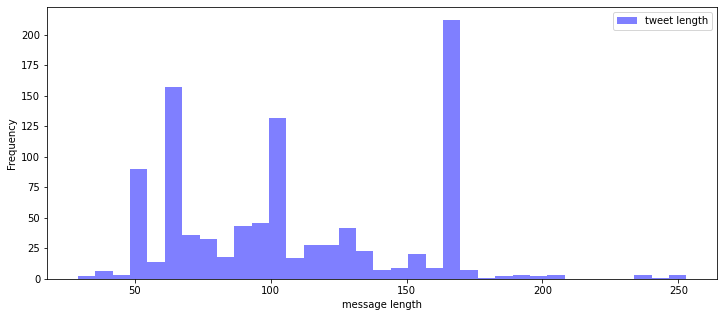

In [19]:
plt.figure(figsize=(12,5))
twt1['text_length'].plot(bins=35,kind='hist',color='blue',label='tweet length',alpha=0.5)
plt.legend()
plt.xlabel('message length')
plt.show()

In [20]:
textFeatures = twt1['text'].copy()
#create TfidVectorizer to create the numerical values
vectorizer = TfidfVectorizer(stop_words="english",decode_error='ignore', lowercase = True, min_df=2)

#numericalize the textFeatures
features = vectorizer.fit_transform(textFeatures.values.astype('U'))

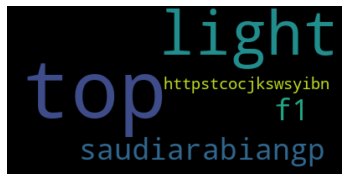

In [61]:
text = twt1.text[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [22]:
feature_names = vectorizer.get_feature_names()
dense = features.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)

In [23]:
print(vectorizer.vocabulary_)

{'light': 338, 'saudiarabiangp': 488, 'f1': 163, 'httpstcocjkswsyibn': 250, 'lewi': 334, 'hamilton': 213, 'fastest': 171, 'lap': 326, 'level': 333, 'championship': 78, 'race': 455, 'max': 363, 'verstappen': 579, '3695': 6, 'point': 437, 'httpstcohnhfpeld3j': 259, 'zero': 621, 'win': 606, 'httpstco6rfnxmuth7': 236, 'botta': 58, 'ocon': 401, 'f12021': 164, 'emot': 144, 'weekend': 596, 'team': 541, 'come': 95, 'close': 92, 'flag': 186, 'p12': 416, 'dnf': 129, 'galleri': 196, 'saudi': 486, 'arabian': 32, 'grand': 207, 'prix': 448, 'photo': 427, 'stori': 530, 'httpstcojitq7tgsof': 262, 'second': 494, 'penalti': 421, 'hand': 214, 'fivesecond': 184, 'leav': 329, 'track': 564, 'gain': 195, 'advantag': 17, 'make': 355, 'titl': 554, 'rival': 477, 'final': 180, 'christian': 86, 'horner': 231, 'think': 547, 'feel': 173, 'hard': 217, 'incid': 300, 'theyll': 545, 'steward': 527, 'tri': 566, 'place': 431, 'formula1': 188, 'start': 523, 'finish': 182, '2nd': 5, 'event': 151, 'lot': 349, 'thing': 546, 

In [24]:
 # functions taken from https://kavita-ganesan.com/extracting-keywords-from-text-tfidf/#.YKsxni9h3jA

def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=False)

def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]

    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])

    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

In [25]:
feature_names = vectorizer.get_feature_names()

sorted_items=sort_coo(features.tocoo())
sorted_items

keywords=extract_topn_from_vector(feature_names,sorted_items,10)

In [34]:
keywords

{'saudiarabiangp': 0.035}

In [26]:
# Show us the top 10 most common words
counts = pd.DataFrame(features.toarray(),
                      columns=vectorizer.get_feature_names())

counts.T.sort_values(by=0, ascending=False).head(10)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
httpstcocjkswsyibn,0.684428,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
light,0.678522,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
f1,0.224132,0.120005,0.219819,0.156834,0.000000,0.064698,0.081841,0.123037,0.075223,0.000000,...,0.219819,0.105049,0.000000,0.146127,0.183743,0.000000,0.000000,0.109928,0.146127,0.112820
saudiarabiangp,0.144678,0.077464,0.141894,0.101237,0.067620,0.041763,0.052829,0.079421,0.048557,0.081094,...,0.141894,0.067809,0.037587,0.094325,0.118607,0.081094,0.081094,0.070959,0.094325,0.072825
pace,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
overregul,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
overtak,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
overtakethefutur,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
p11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
p12,0.000000,0.000000,0.000000,0.000000,0.403205,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


    Fitting the initial k-means model with 5 clusters since we do not know the optimal number of clusters 

In [63]:
# kmeans model with the 5 clusters since we don't know the optimal number of clusters 
model = KMeans(n_clusters=5, random_state=42, n_jobs=-1)
model.fit(df)

# gather the predictions
preds= model.predict(df)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [64]:

score = metrics.silhouette_score(df, preds)
score

0.3768147312638259

    0.37 accuracy. not good at all
    
    the code below will fit the model with range of 2 to 60 clusters. 

In [65]:
# determine the optimal number of clusters 
sum_sq= []

# fit the model for a range of 2 to 60 clusters and add to sum_sq[]
for n in range (2,60):
    print('Calculating for ',n,' clusters')
    
    # random_start makes the results reproducible 
    # n_jobs=-1 means run with all machine processors
    model = KMeans(n_clusters=n, random_state=42, n_jobs=-1)
    model.fit(df)
    sum_sq.append(-model.score(df))

Calculating for  2  clusters
Calculating for  3  clusters


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Calculating for  4  clusters
Calculating for  5  clusters


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Calculating for  6  clusters


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Calculating for  7  clusters


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Calculating for  8  clusters


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Calculating for  9  clusters


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Calculating for  10  clusters


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Calculating for  11  clusters


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Calculating for  12  clusters


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Calculating for  13  clusters


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Calculating for  14  clusters


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Calculating for  15  clusters


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Calculating for  16  clusters


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Calculating for  17  clusters


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Calculating for  18  clusters


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Calculating for  19  clusters


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Calculating for  20  clusters


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Calculating for  21  clusters


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Calculating for  22  clusters


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Calculating for  23  clusters


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Calculating for  24  clusters


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Calculating for  25  clusters


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Calculating for  26  clusters


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Calculating for  27  clusters


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Calculating for  28  clusters


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Calculating for  29  clusters


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Calculating for  30  clusters


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Calculating for  31  clusters


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Calculating for  32  clusters


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Calculating for  33  clusters


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Calculating for  34  clusters


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Calculating for  35  clusters


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Calculating for  36  clusters


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Calculating for  37  clusters


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Calculating for  38  clusters


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Calculating for  39  clusters


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Calculating for  40  clusters


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Calculating for  41  clusters


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Calculating for  42  clusters


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Calculating for  43  clusters


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Calculating for  44  clusters


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Calculating for  45  clusters


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Calculating for  46  clusters


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Calculating for  47  clusters


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Calculating for  48  clusters


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Calculating for  49  clusters


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Calculating for  50  clusters


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Calculating for  51  clusters


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Calculating for  52  clusters


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Calculating for  53  clusters


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Calculating for  54  clusters


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Calculating for  55  clusters


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Calculating for  56  clusters


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Calculating for  57  clusters


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Calculating for  58  clusters


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Calculating for  59  clusters


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[739.5980034428485,
 679.8966901320553,
 636.3418631325618,
 583.1792195322112,
 539.4755024533129,
 520.7878368941222,
 492.162520562495,
 486.05186453400626,
 452.3114985169204,
 448.1078327271423,
 431.5918172148538,
 419.8337363539469,
 405.32881973889494,
 389.0090009676905,
 385.8622697544565,
 366.1384967175129,
 361.6504677513741,
 346.2692438013001,
 334.4688641989032,
 325.4942634830055,
 321.6644448818212,
 314.6525069551306,
 308.3226964650478,
 302.57081870275454,
 297.4394254838011,
 291.63005629317246,
 285.14050705073936,
 283.0016028447118,
 277.86920277958876,
 272.3319763853787,
 268.1421230384956,
 262.46087352385103,
 256.09839735938544,
 256.8713251982561,
 250.7850467330952,
 243.7905973570653,
 242.27860701432363,
 237.71999568286998,
 236.64820146246132,
 229.62754408506743,
 225.2003558747283,
 221.64341719017992,
 222.30652454610575,
 218.84151858532647,
 215.97068742043172,
 212.89832634298483,
 206.38029205727116,
 205.16879179081644,
 200.757635300496,
 19

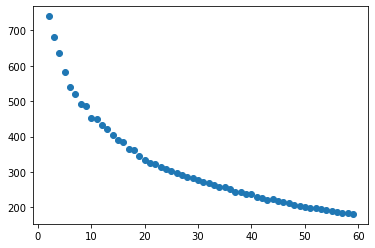

In [31]:
# make our scree plot to visually see the optimal number of clusters


plt.scatter(range(2, 60), sum_sq)
np.diff(sum_sq)
sum_sq

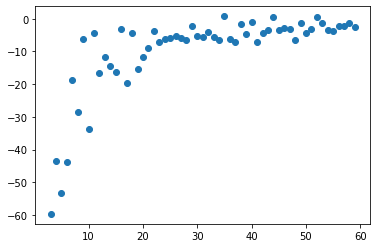

In [33]:
# compare the scree plot with a np.diff() plot

plt.scatter(range(3, 60), np.diff(sum_sq))

    Based on the two graphs above, 13 clusters seems to be the best.

In [66]:
# kmeans model with the optimal number of clusters, 13 clusters
model = KMeans(n_clusters=13, random_state=42, n_jobs=-1)
model.fit(df)

# gather the predictions
preds= model.predict(df)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [67]:

score = metrics.silhouette_score(df, preds)
score

0.5416121081587273

    0.54 accuracy, better than 5 clusters but still not that good

Text(0.5, 1.0, 'Projection of the clustering on a the axis of the PCA')

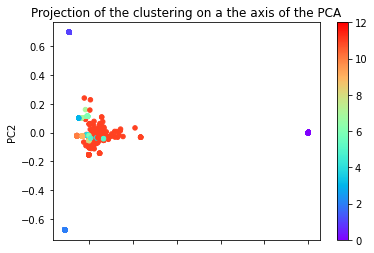

In [68]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_reduced = pca.fit_transform(df)
data_reduced = pd.DataFrame(data_reduced)

ax = data_reduced.plot(kind='scatter', x=0, y=1, c=preds, cmap='rainbow')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Projection of the clustering on a the axis of the PCA')

    the plot above shows that clusters are overlapping, and red cluster has most of the datapoint.
    
    Since we figured the best number of clusters in range of 2-60. Now let's try to fit the model in range of 60-90

In [45]:
# fit the model for a range of 20 to 50 clusters and add to sum_sq[]
for n in range (60,90):
    # random_start makes the results reproducible 
    # n_jobs=-1 means run with all machine processors
    model = KMeans(n_clusters=n, random_state=42, n_jobs=-1)
    model.fit(X=df)
    # gather the predictions
    preds= model.predict(df)
    score = metrics.silhouette_score(df, preds)
    print('Silhouette score for ',n,' clusters: ',score)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Silhouette score for  60  clusters:  0.7673732027179845


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Silhouette score for  61  clusters:  0.7630094467609034


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Silhouette score for  62  clusters:  0.7708349481188833


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Silhouette score for  63  clusters:  0.7658736749313648


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Silhouette score for  64  clusters:  0.7687321429464367


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Silhouette score for  65  clusters:  0.7675850771016112


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Silhouette score for  66  clusters:  0.7695616237488894


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Silhouette score for  67  clusters:  0.7764793391461603


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Silhouette score for  68  clusters:  0.7772962854203697


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Silhouette score for  69  clusters:  0.7794125906030258


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Silhouette score for  70  clusters:  0.7806576553481012


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Silhouette score for  71  clusters:  0.7799945994771997


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Silhouette score for  72  clusters:  0.7830650444362921


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Silhouette score for  73  clusters:  0.7812964594642653


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Silhouette score for  74  clusters:  0.783702334944278


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Silhouette score for  75  clusters:  0.7868901574442861


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Silhouette score for  76  clusters:  0.7878685619561406


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Silhouette score for  77  clusters:  0.7896597620566218


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Silhouette score for  78  clusters:  0.7877679932564896


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Silhouette score for  79  clusters:  0.7937722125170369


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Silhouette score for  80  clusters:  0.7936765092522794


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Silhouette score for  81  clusters:  0.797962158233947


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Silhouette score for  82  clusters:  0.7977148954942908


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Silhouette score for  83  clusters:  0.7999794184341333


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Silhouette score for  84  clusters:  0.7987223775479133


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Silhouette score for  85  clusters:  0.801977102441226


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Silhouette score for  86  clusters:  0.8071281884863907


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Silhouette score for  87  clusters:  0.8036078465046018


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Silhouette score for  88  clusters:  0.8027187122631168


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Silhouette score for  89  clusters:  0.8073543251512213


    89 clusters seem to perform the best. However, I have concerns that although this huge number of clusters will give the best accuracy, it will put datapoints in different clusters that belong to the same clusters which is not the point of fitting the model at all.

In [69]:
# kmeans model with the optimal number of clusters, 2 clusters
model = KMeans(n_clusters=89, random_state=42, n_jobs=-1)
model.fit(df)

# gather the predictions
preds= model.predict(df)

from sklearn import metrics
score = metrics.silhouette_score(df, preds)
score

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


0.8073543251512213

Text(0.5, 1.0, 'Projection of the clustering on a the axis of the PCA')

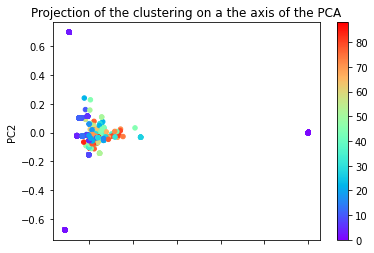

In [71]:
# visualize the clusters
pca = PCA(n_components=89)
data_reduced = pca.fit_transform(df)
data_reduced = pd.DataFrame(data_reduced)

ax = data_reduced.plot(kind='scatter', x=0, y=1, c=preds, cmap='rainbow')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Projection of the clustering on a the axis of the PCA')

        Still all clusters are overlapping. 

In [72]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

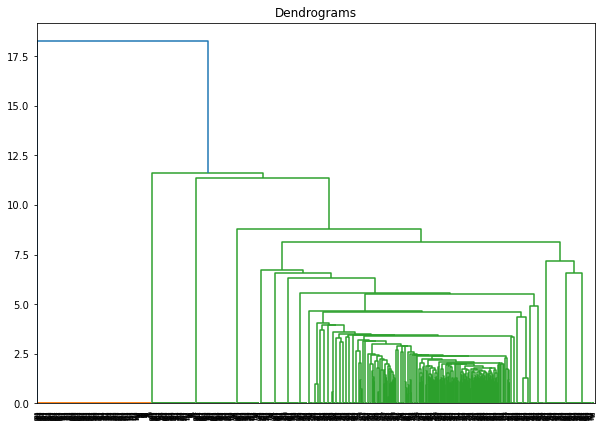

In [73]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df, method='ward'))

    This shows the same overlapping problem in the model. let's draw the line to see the suggested number of clusters 

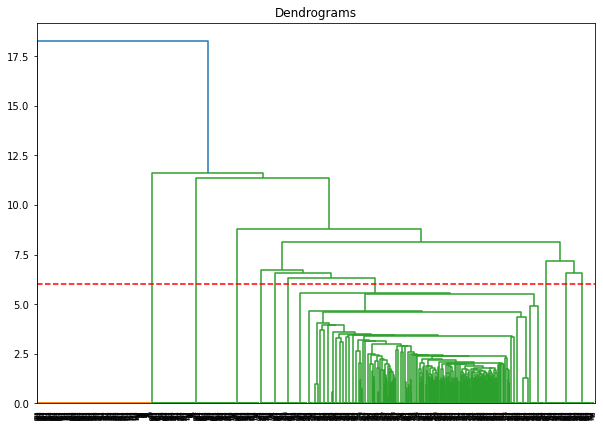

In [50]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

    Based on the above, the line suggests that 10 clusters is the best option 

In [57]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')  
cluster.fit_predict(df)

array([8, 7, 5, 0, 0, 0, 0, 0, 0, 3, 1, 3, 0, 4, 0, 0, 5, 0, 0, 1, 0, 0,
       0, 4, 4, 5, 0, 7, 4, 0, 3, 3, 3, 0, 0, 0, 0, 3, 0, 3, 4, 0, 0, 3,
       0, 5, 3, 0, 3, 1, 0, 0, 5, 3, 7, 2, 0, 0, 0, 5, 0, 7, 3, 3, 5, 0,
       4, 3, 3, 3, 2, 0, 3, 0, 0, 0, 7, 0, 0, 3, 5, 5, 0, 3, 3, 0, 7, 3,
       0, 3, 1, 1, 0, 5, 2, 5, 3, 5, 0, 0, 0, 0, 3, 0, 0, 3, 3, 0, 0, 3,
       3, 5, 0, 1, 4, 3, 0, 0, 0, 0, 7, 0, 0, 0, 3, 0, 0, 0, 9, 4, 0, 0,
       0, 0, 0, 0, 0, 3, 5, 3, 4, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 5, 1,
       3, 0, 0, 5, 3, 1, 0, 0, 9, 0, 3, 3, 3, 0, 4, 3, 0, 0, 0, 3, 3, 0,
       4, 3, 0, 0, 9, 0, 6, 5, 0, 0, 0, 2, 0, 7, 1, 7, 7, 4, 0, 8, 8, 0,
       9, 6, 1, 6, 3, 0, 0, 0, 3, 0, 0, 0, 0, 3, 4, 4, 0, 3, 4, 0, 0, 3,
       6, 1, 0, 0, 0, 5, 1, 0, 0, 6, 0, 3, 3, 1, 6, 0, 0, 0, 3, 0, 0, 7,
       5, 4, 0, 5, 5, 5, 0, 0, 3, 5, 0, 3, 0, 3, 0, 3, 0, 0, 5, 3, 0, 0,
       1, 3, 5, 0, 1, 3, 0, 1, 3, 0, 0, 5, 1, 3, 5, 3, 4, 0, 0, 3, 0, 6,
       8, 0, 4, 3, 3, 3, 3, 0, 3, 0, 0, 6, 6, 0, 3,

In [75]:
# KMeans clustering a kind of clustering.

number_of_clusters=10
km = KMeans(n_clusters=number_of_clusters)
# Normally people fit the matrix
km.fit(df)

km.fit
preds1= km.predict(df)
score = metrics.silhouette_score(df, preds1)
score

0.5049751443971293

Text(0.5, 1.0, 'Projection of the clustering on a the axis of the PCA')

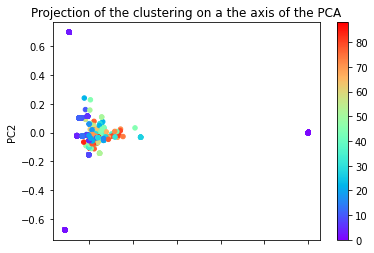

In [79]:
# visualize the clusters
pca = PCA(n_components=10)
data_reduced = pca.fit_transform(df)
data_reduced = pd.DataFrame(data_reduced)

ax = data_reduced.plot(kind='scatter', x=0, y=1, c=preds, cmap='rainbow')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Projection of the clustering on a the axis of the PCA')

    Still the accuracy is 0.50 and we can't distinguish clusters, but I think this is the best we can do. 

In [80]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :10]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

Top terms per cluster:
Cluster 0: thank httpstco5kv8083ebd keeppush 2nd went support vote gave fan finish
Cluster 1: saudiarabiangp f1 verstappen max lewi hamilton race light httpstcocjkswsyibn lap
Cluster 2: httpstco6rfnxmuth7 zero win point race f1 saudiarabiangp support dhabi abu
Cluster 3: 1974 httpstcoawnshxnyt7 tie sinc stand time final point driver f1
Cluster 4: big httpstcobkwwqlcbyo talk jeddah point f1 saudiarabiangp race win podium
Cluster 5: valtteribotta httpstcofyaone7epm oconesteban close second got line season podium f1
Cluster 6: httpstcofywnwcxvyy f1driveroftheday jeddah max f1 saudiarabiangp win start httpstco6rfnxmuth7 lot
Cluster 7: unforgett best bit jeddah f1 saudiarabiangp win podium httpstco6rfnxmuth7 lot
Cluster 8: landonorri thought good tricki httpstcoxmn8hskuzf hes lando flag team red
Cluster 9: bull merced httpstcotz0qatzg3z 28point cushion round red team stand final


    I have noticed that there is links in the text that haven't been removed. this is due to the F1 grand prix which people circulating videos and pictures of the race. 
    To conclude, further analysis and cleaning are needed to get insight from the data.

### References 

https://www.geeksforgeeks.org/extracting-tweets-containing-a-particular-hashtag-using-python/

https://github.com/akanshajainn/K-means-Clustering-on-Text-Documents/blob/master/doc_clustering.py

